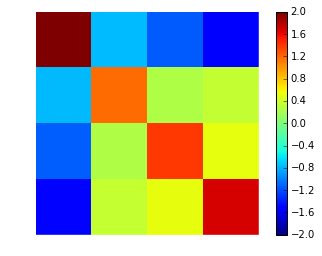

Spacetime interval for X1: -600233
Spacetime interval for X2: -600233
Intervals are identical within rounding


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def boost_matrix( v ):
    '''
    Generates a boost matrix
    '''
    if v.shape != (3,):
        raise ValueError("Bad Shape")
        
    beta = v / 3e8
    beta_norm = np.linalg.norm(beta)
    n = beta/beta_norm
    gamma = 1 / np.sqrt(1- np.linalg.norm(beta)**2)
    
    boost = np.zeros((4,4))
    boost[0][0] = gamma
    
    for i in range(4):
        for j in range(4):
            if bool(i==0) ^ bool(j==0):
                boost[i][j] = -gamma * beta_norm * n[j-1 if i==0 else i-1]
            if i>0 and j>0 and i!=j:
                boost[i][j] = (gamma-1) * n[i-1] * n[j-1]
            if i==j and i!=0:
                boost[i][j] = 1+(gamma-1)*n[i-1]**2
    
    return boost

def spacetime_interval( pos_fourvec ):
    '''
    Calculates the spacetime interval when given position four-vector
    '''
    if pos_fourvec.shape != (4,1):
        raise ValueError("Bad Shape")
    
    ct2 = pos_fourvec[0]**2
    r2 = pos_fourvec[1]**2 + pos_fourvec[2]**2 + pos_fourvec[3]**2
    
    return float(ct2-r2)
        
def matrix_show( mat ):
    '''
    pretty plots
    '''
    plt.imshow(mat, interpolation='none', vmin=-2, vmax=2)
    plt.colorbar()
    plt.axis('off')
    plt.show()
    
# Make a boost matrix
vv = np.array([1e8,1.5e8,2e8])
b1 = boost_matrix(vv)
matrix_show(b1)

# Make a random four_vector X_1
rnd_xn = lambda : np.random.randint(0,1000)
X_1 = np.reshape([rnd_xn(),rnd_xn(), rnd_xn(), rnd_xn()], (4,1))

# Transform to X_2 using boost matrix
X_2 = np.dot(b1, X_1)

# Check that Einstein was right
print("Spacetime interval for X1:", round(spacetime_interval(X_1)))
print("Spacetime interval for X2:", round(spacetime_interval(X_2)))
if spacetime_interval(X_1)-spacetime_interval(X_2) < 0.001:
    print("Intervals are identical within rounding")